# 關於 COLAB 使用的小技巧

- JW
- 2025-09-02

## COLAB 已經安裝好許多套件

可以使用 `installed.packages()` 查詢。

以下我只列出我有在關注的

##### 📊 資料科學核心套件

Tidyverse 生態系

- tidyverse - 資料科學核心套件集合
- dplyr - 資料操作和轉換
- tidyr - 資料整理和重塑
- ggplot2 - 資料視覺化
- readr - 讀取各種格式檔案
- purrr - 函數式程式設計
- tibble - 現代化資料框
- stringr - 字串處理
- forcats - 因子變數處理
- lubridate - 日期時間處理

資料讀取與匯出

- haven - 讀取 SPSS, SAS, Stata 檔案
- readxl - 讀取 Excel 檔案
- dbplyr - 資料庫查詢
- jsonlite - JSON 資料處理


資料視覺化

- ggplot2 - 主要繪圖套件
- lattice - 傳統統計繪圖


##### 🧠 統計分析與心理計量

- boot - Bootstrap 重抽樣
- MASS - 現代應用統計
- survival - 存活分析
- mgcv - 廣義相加模型
- nlme - 非線性混合效應模型
- broom - 整理統計模型輸出


##### 🔧 程式開發與效能

- Rcpp - C++ 整合
- data.table - 高效能資料處理
- Matrix - 稀疏矩陣運算
- devtools - 套件開發工具
- usethis - 專案設定工具
- testthat - 單元測試
- roxygen2 - 文檔產生


In [10]:
library(tidyverse)
library(lattice)
library(haven)

## COLAB 套件安裝方法

#### Problem.

傳統上 R 的套件安裝方法是 `install.packages()`，但你會發現，在 Colab 上這樣安裝套件會非常慢。

#### Solution.

COLAB 由於是建立在 UBUNTU 環境上，因此可以適用更快的安裝方法。那就是用 APT 套件。

例如（好像不用 sudo 也行）。

```
system("sudo apt install r-cran-sjlabelled")
system("sudo apt install r-cran-lavaan")
system("sudo apt install r-cran-psych")
```

## 資料檔讀取可以用 dropbox 連結

#### Problem.

之前我都是把 csv 檔拉到左邊的 FILE 區，然後讀取。

#### Solution.

但我發現 dropbox 連結居然也可以！但是需要小修改。需要把 0 改為 1.

例如：原本的分享連結 `https://www.dropbox.com/scl/fi/p5fz99jarbidzrejixrbm/data1.sav?rlkey=qaco6jhkl7ifksp1woe1n6zoc&st=odp5oi9j&dl=0`

改成 `https://www.dropbox.com/scl/fi/p5fz99jarbidzrejixrbm/data1.sav?rlkey=qaco6jhkl7ifksp1woe1n6zoc&st=odp5oi9j&dl=1`

就可以在 R 中讀取了！

#### Discussion (Claude)


##### 🗂️ **Dropbox 連結轉換**

**為什麼要把 0 改成 1？**
- **原始分享連結** (dl=0): 導向 Dropbox 預覽頁面
- **直接下載連結** (dl=1): 直接取得檔案內容

```r
# ❌ 無法直接讀取 (預覽頁面)
url <- "https://www.dropbox.com/s/abc123/data.csv?dl=0"

# ✅ 可以直接讀取 (檔案內容)
url <- "https://www.dropbox.com/s/abc123/data.csv?dl=1"
data <- read.csv(url)
```

**原理說明**
- `dl=0`: 返回 HTML 頁面（包含檔案預覽、下載按鈕等）
- `dl=1`: 返回原始檔案內容（純 CSV、純文字等）
- R 的 `read.csv()` 需要純檔案內容，不能處理 HTML 頁面

##### 🌐 **其他雲端儲存服務**

**Google Drive**
```r
# 原始分享連結
"https://drive.google.com/file/d/FILE_ID/view?usp=sharing"

# 直接下載連結
"https://drive.google.com/uc?export=download&id=FILE_ID"
```

**OneDrive**
```r
# 原始分享連結
"https://onedrive.live.com/view.aspx?resid=RESID"

# 直接下載連結 (將 view.aspx 改為 download.aspx)
"https://onedrive.live.com/download.aspx?resid=RESID"
```

**GitHub**
```r
# 網頁檢視連結
"https://github.com/user/repo/blob/main/data.csv"

# 直接檔案連結 (raw)
"https://raw.githubusercontent.com/user/repo/main/data.csv"
```

##### 🔍 **通用原則**

| 雲端服務 | 分享連結類型 | 直接連結方法 |
|----------|-------------|-------------|
| **Dropbox** | 預覽頁面 | `dl=0` → `dl=1` |
| **Google Drive** | 預覽頁面 | 使用 `uc?export=download&id=` |
| **OneDrive** | 預覽頁面 | `view.aspx` → `download.aspx` |
| **GitHub** | 網頁檢視 | 使用 `raw.githubusercontent.com` |



##### ⚠️ **注意事項**

1. **權限設定**: 確保檔案設為「任何人都可檢視」
2. **檔案大小**: 大檔案可能有下載限制
3. **連結有效性**: 某些連結可能有時效性
4. **網路環境**: 某些地區可能無法存取特定雲端服務

##### 🎯 **最佳實踐**

- **開發階段**: 使用 GitHub raw 連結（最穩定）
- **小型檔案**: Dropbox 或 Google Drive 都可以
- **大型檔案**: 考慮使用專門的資料託管服務
- **敏感資料**: 避免使用公開連結，考慮 API 方式存取

In [11]:
link36 = "https://www.dropbox.com/scl/fi/p5fz99jarbidzrejixrbm/data1.sav?rlkey=qaco6jhkl7ifksp1woe1n6zoc&st=odp5oi9j&dl=1"
data36 <- read_sav(link36)
head(data36)

release_id,interviewer_id,baby_sex,baby_doby,baby_dobm,int_y,int_m,int_months,relationship,pfa0101,⋯,growm03,growd03,growheigh04,groweight04,growy04,growm04,growd04,wsel0,w_post_sel,w_raking_sel
<chr>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
R000240580,20019,1,2013,11,2016,10,35.44110,3,1,⋯,8888,8888,83,10.5,104,11,7,0.7725441,1.1654846,0.8851777
R000404880,20020,1,2013,12,2016,11,35.44110,3,1,⋯,8888,8888,8888,8888.0,8888,8888,8888,0.7779788,1.1654846,0.8914047
R000526172,30006,2,2014,1,2017,2,36.82192,3,1,⋯,8888,8888,84,10.0,105,5,2,1.0177128,1.2005033,1.1154755
R000776066,20056,2,2013,12,2017,1,37.08493,3,1,⋯,6,10,92,13.5,105,4,9,0.8835888,0.8994814,0.7995080
R001024288,30014,1,2013,11,2016,10,35.04658,3,1,⋯,8888,8888,89,17.5,104,11,1,1.0819462,0.9191077,0.9940679
R001097123,30039,1,2014,2,2017,1,35.14521,2,1,⋯,8888,8888,8888,8888.0,8888,8888,8888,1.3562218,0.9191077,1.2460663


## COLAB 畫圖小技巧

#### Problem.

在 Colab 上畫圖，圖面都太小了。反觀 julia 或 python 圖面都很大很好看。

#### Solution.

在 colab 上用 r 畫圖，請務必加這一行。

- `options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)`


增加這一句會讓 R 在 Jupyter 上的繪圖好很多（放大）。


In [3]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

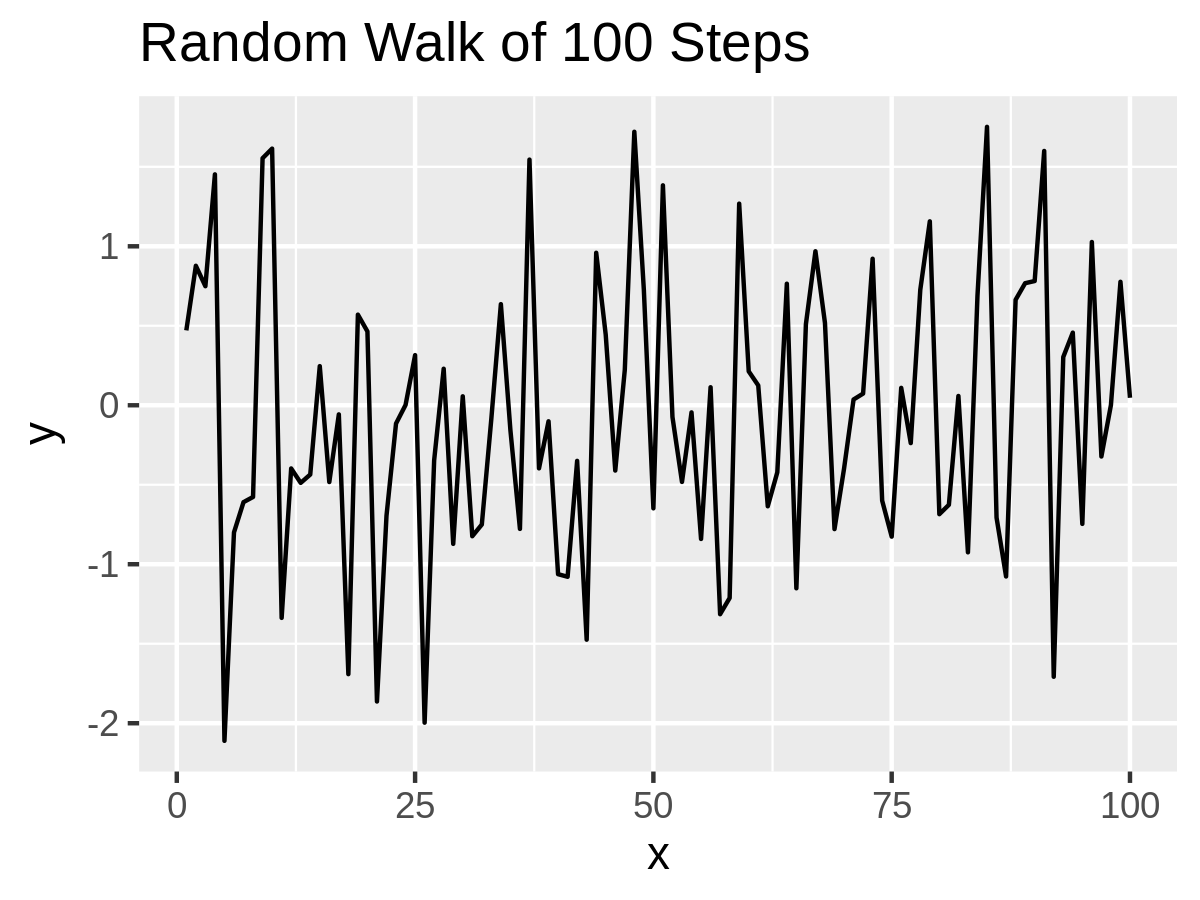

In [4]:
tibble(
  x = 1:100,
  y = rnorm(100)
) |> ggplot(aes(x=x,y=y)) +
  geom_line() +
  labs(title="Random Walk of 100 Steps")

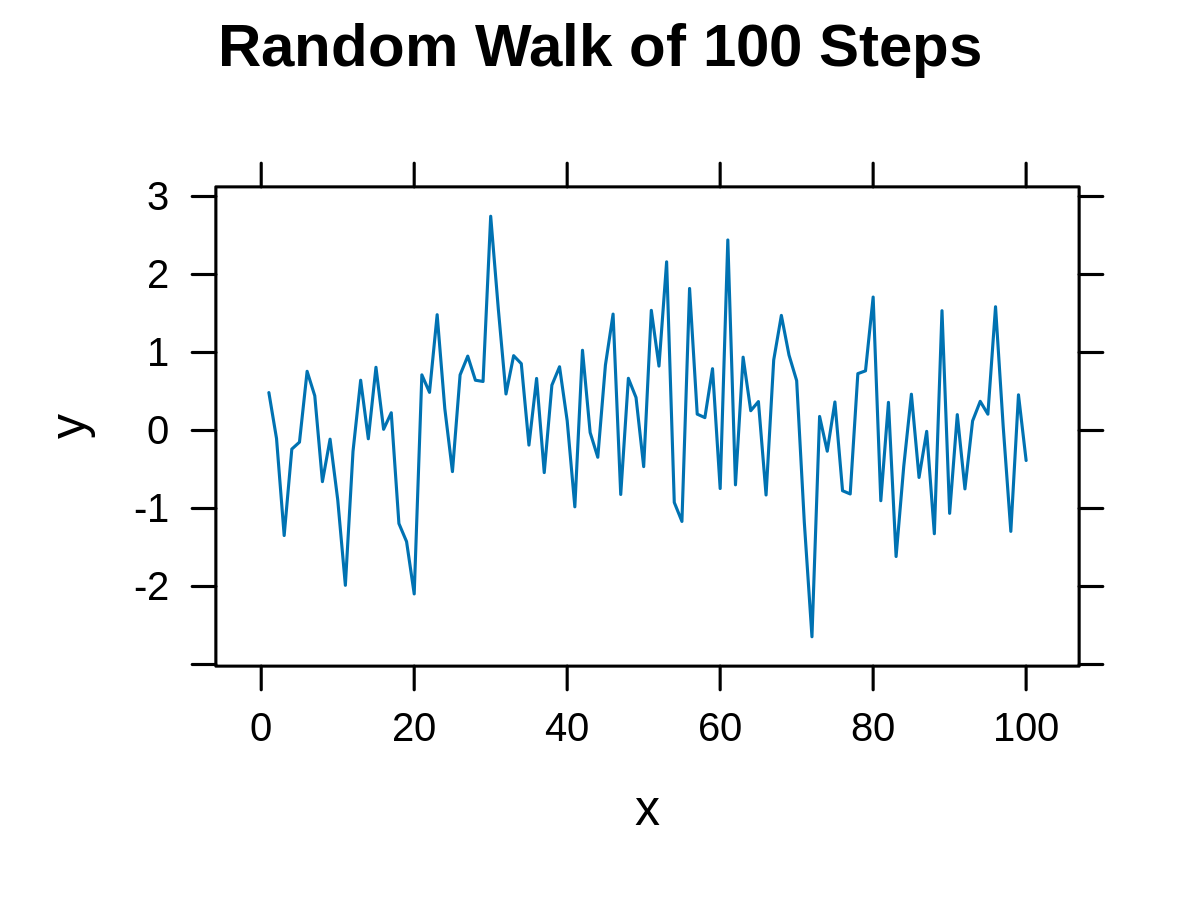

In [7]:
# 建立資料
data.frame(
  x = 1:100,
  y = rnorm(100)
) %>%
# 使用 lattice 繪圖
xyplot(y ~ x,
       data = .,
       type = "l",                              # 線圖
       main = "Random Walk of 100 Steps",       # 標題
       xlab = "x",                              # x軸標籤
       ylab = "y",                              # y軸標籤
)

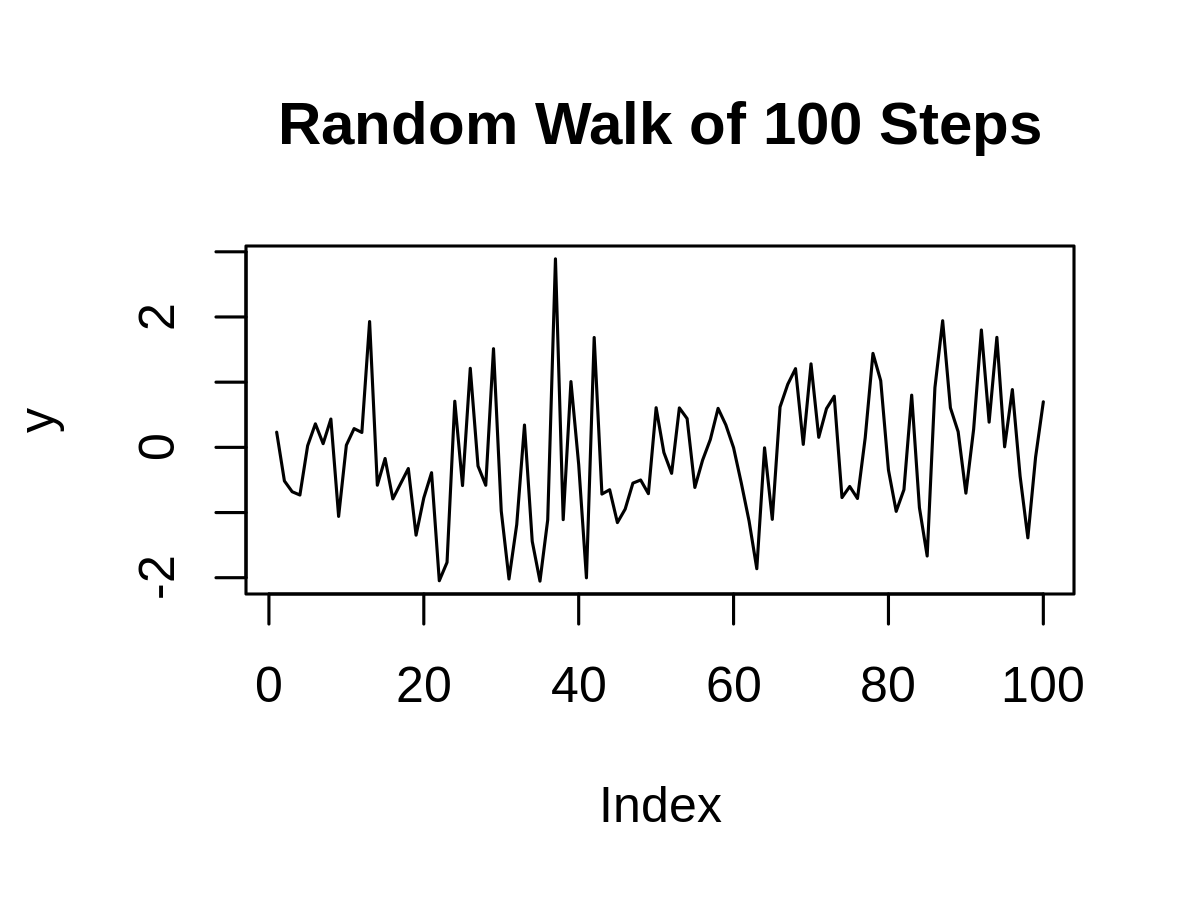

In [8]:
y=rnorm(100)
plot(y, type='l')
title("Random Walk of 100 Steps")

## APT 也要更新 2025-08-25

#### _Problem._

在 Google Colab 中使用 `system("apt install r-cran-tam")` 安裝 R 套件明明顯示成功，但執行 `library(TAM)` 時卻無法正常載入套件。


#### *Solution.*

關鍵在於先更新 APT 套件清單，完整的安裝流程如下：


```
# 1. 先更新 APT 套件清單
system("apt-get update")

# 2. 安裝所需的 R 套件
system("apt install r-cran-tam")

# 3. 現在可以正常載入了
library(TAM)
```
